In [1]:
import matplotlib.pyplot as plt
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

import seaborn as sns
import numpy as np
import keras


%matplotlib inline


Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("Training data shape: ", X_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", X_test.shape)

print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]


In [0]:
num_classes = 10
batch_size = 128
nb_epoch = 10

In [5]:
from keras import backend as K

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
y_train.shape

(60000, 10)

### 4 layer CNN Model with 3*3 kernel size

In [0]:
model1=Sequential() # Initializing the model

# First ConvNet
model1.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))

model1.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))


model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))

model1.add(BatchNormalization())

#maxpooling by (2,2 ) ,dropout,flattening
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(0.5))


model1.add(Flatten())

#hidden_layer
model1.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model1.add(Dropout(0.5))

model1.add(Dense(num_classes,activation='softmax'))

print(model1.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_1

In [0]:
model1.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [0]:
# Training the model
history = model1.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 275s 5ms/step - loss: 0.0499 - acc: 0.9848 - val_loss: 0.0229 - val_acc: 0.9927
Epoch 2/10
60000/60000 [==============================] - 294s 5ms/step - loss: 0.0443 - acc: 0.9868 - val_loss: 0.0293 - val_acc: 0.9911
Epoch 3/10
60000/60000 [==============================] - 283s 5ms/step - loss: 0.0430 - acc: 0.9869 - val_loss: 0.0262 - val_acc: 0.9930
Epoch 4/10
60000/60000 [==============================] - 290s 5ms/step - loss: 0.0385 - acc: 0.9881 - val_loss: 0.0218 - val_acc: 0.9939
Epoch 5/10
60000/60000 [==============================] - 276s 5ms/step - loss: 0.0401 - acc: 0.9881 - val_loss: 0.0211 - val_acc: 0.9930
Epoch 6/10
60000/60000 [==============================] - 281s 5ms/step - loss: 0.0363 - acc: 0.9891 - val_loss: 0.0265 - val_acc: 0.9933
Epoch 7/10
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0373 - acc: 0.9890 - val_loss: 0.0205 - 

In [0]:
score = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 12s 1ms/step
Test loss: 0.023638954546318383
Test accuracy: 0.9934


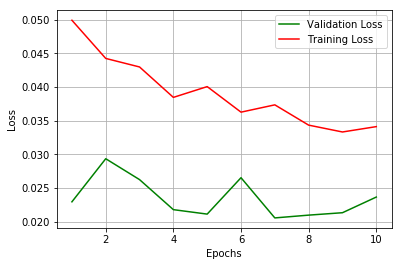

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

### Changing the dropout rate to 0.8

In [51]:
model1=Sequential() # Initializing the model

# First ConvNet
model1.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))

model1.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))


model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.8))

model1.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))

model1.add(BatchNormalization())

#maxpooling by (2,2 ) ,dropout,flattening
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(0.8))


model1.add(Flatten())

#hidden_layer
model1.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model1.add(Dropout(0.8))

model1.add(Dense(num_classes,activation='softmax'))

print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_8 (Batch (None, 10, 10, 128)       512       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 128)         0         
__________

In [0]:
model1.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [53]:
# Training the model
history = model1.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 131us/step - loss: 1.7834 - acc: 0.5106 - val_loss: 0.6643 - val_acc: 0.8093
Epoch 2/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.6437 - acc: 0.7938 - val_loss: 0.4694 - val_acc: 0.8699
Epoch 3/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.4384 - acc: 0.8653 - val_loss: 0.1793 - val_acc: 0.9469
Epoch 4/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.3536 - acc: 0.8937 - val_loss: 0.2200 - val_acc: 0.9374
Epoch 5/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.3079 - acc: 0.9092 - val_loss: 0.1993 - val_acc: 0.9475
Epoch 6/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.2859 - acc: 0.9165 - val_loss: 0.2217 - val_acc: 0.9411
Epoch 7/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.2697 - acc: 0.9222 - val_loss: 0.3407 - val_ac

In [54]:
score = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 70us/step
Test loss: 0.122405351941369
Test accuracy: 0.9697


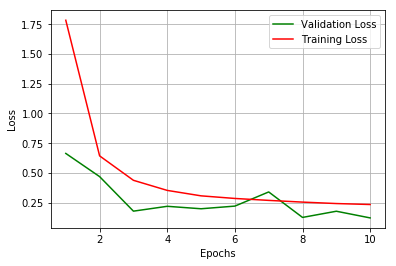

In [55]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

### Changing the dropout rate to 0.2

In [46]:
model1=Sequential() # Initializing the model

# First ConvNet
model1.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))

model1.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))


model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))

model1.add(BatchNormalization())

#maxpooling by (2,2 ) ,dropout,flattening
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(0.2))


model1.add(Flatten())

#hidden_layer
model1.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model1.add(Dropout(0.2))

model1.add(Dense(num_classes,activation='softmax'))

print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_7 (Batch (None, 10, 10, 128)       512       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 128)         0         
__________

In [0]:
model1.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [48]:
# Training the model
history = model1.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.1425 - acc: 0.9573 - val_loss: 0.0573 - val_acc: 0.9811
Epoch 2/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0490 - acc: 0.9850 - val_loss: 0.0386 - val_acc: 0.9876
Epoch 3/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0343 - acc: 0.9894 - val_loss: 0.0324 - val_acc: 0.9902
Epoch 4/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0280 - acc: 0.9912 - val_loss: 0.0552 - val_acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0266 - acc: 0.9915 - val_loss: 0.0349 - val_acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0219 - acc: 0.9930 - val_loss: 0.0358 - val_acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0209 - acc: 0.9935 - val_loss: 0.0393 - val_a

In [49]:
score = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 70us/step
Test loss: 0.07362920074305221
Test accuracy: 0.9802


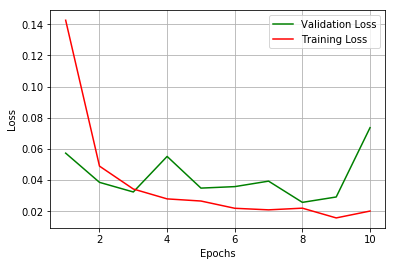

In [50]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

### 4 Convolution layers with 5*5 kernel size

In [0]:
model2=Sequential() # Initializing the model

# First ConvNet
model2.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    input_shape=input_shape))

model2.add(Conv2D(64,kernel_size=(5,5),
                    activation='relu'))


model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128,kernel_size=(5,5),
                   activation='relu'))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.5))


model2.add(Flatten())

#hidden layer
model2.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model2.add(Dropout(0.5))

model2.add(Dense(num_classes,activation='softmax'))

print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 6, 6, 128)         204928    
_________________________________________________________________
batch_normalization_5 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 128)         0         
__________

In [0]:
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [0]:
# Training the model
history = model2.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.2036 - acc: 0.9362 - val_loss: 0.0605 - val_acc: 0.9807
Epoch 2/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0687 - acc: 0.9794 - val_loss: 0.0341 - val_acc: 0.9894
Epoch 3/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0580 - acc: 0.9831 - val_loss: 0.0238 - val_acc: 0.9922
Epoch 4/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0487 - acc: 0.9855 - val_loss: 0.0324 - val_acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0453 - acc: 0.9861 - val_loss: 0.0254 - val_acc: 0.9918
Epoch 6/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0386 - acc: 0.9885 - val_loss: 0.0280 - val_acc: 0.9915
Epoch 7/10
60000/60000 [==============================] - 5s 91us/step - loss: 

In [0]:
score = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

10000/10000 [==============================] - 1s 71us/step
Test loss: 0.02391246041604645
Test accuracy: 0.9931


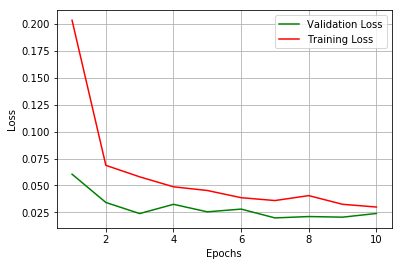

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

### Changing the dropout rate to 0.8

In [16]:
model2=Sequential() # Initializing the model

# First ConvNet
model2.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    input_shape=input_shape))

model2.add(Conv2D(64,kernel_size=(5,5),
                    activation='relu'))


model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.8))

model2.add(Conv2D(128,kernel_size=(5,5),
                   activation='relu'))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.8))


model2.add(Flatten())

#hidden layer
model2.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model2.add(Dropout(0.8))

model2.add(Dense(num_classes,activation='softmax'))

print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 128)         204928    
_________________________________________________________________
batch_normalization_3 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 128)         0         
__________

In [0]:
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [18]:
# Training the model
history = model2.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/step - loss: 1.8169 - acc: 0.4157 - val_loss: 0.5503 - val_acc: 0.8798
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.5645 - acc: 0.8215 - val_loss: 0.2282 - val_acc: 0.9436
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3365 - acc: 0.9025 - val_loss: 0.1625 - val_acc: 0.9603
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2745 - acc: 0.9228 - val_loss: 0.1237 - val_acc: 0.9716
Epoch 5/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2445 - acc: 0.9322 - val_loss: 0.0809 - val_acc: 0.9812
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2217 - acc: 0.9383 - val_loss: 0.0723 - val_acc: 0.9832
Epoch 7/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2086 - acc: 0.9431 - val_loss: 0.0725 - val_ac

In [19]:
score = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

10000/10000 [==============================] - 1s 78us/step
Test loss: 0.06442127133197209
Test accuracy: 0.9845


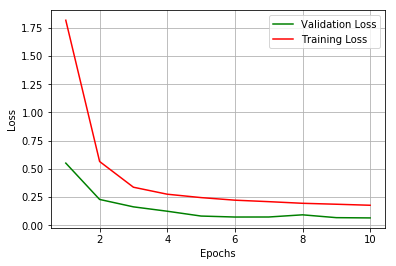

In [20]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show()

### Changing the dropout to 0.2

In [41]:
model2=Sequential() # Initializing the model

# First ConvNet
model2.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    input_shape=input_shape))

model2.add(Conv2D(64,kernel_size=(5,5),
                    activation='relu'))


model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128,kernel_size=(5,5),
                   activation='relu'))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.2))


model2.add(Flatten())

#hidden layer
model2.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model2.add(Dropout(0.2))

model2.add(Dense(num_classes,activation='softmax'))

print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 6, 6, 128)         204928    
_________________________________________________________________
batch_normalization_6 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 128)         0         
__________

In [0]:
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [43]:
# Training the model
history = model2.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.1319 - acc: 0.9587 - val_loss: 0.0327 - val_acc: 0.9900
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0476 - acc: 0.9858 - val_loss: 0.0297 - val_acc: 0.9905
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0360 - acc: 0.9888 - val_loss: 0.0262 - val_acc: 0.9915
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0292 - acc: 0.9910 - val_loss: 0.0312 - val_acc: 0.9907
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0252 - acc: 0.9922 - val_loss: 0.0295 - val_acc: 0.9917
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0211 - acc: 0.9934 - val_loss: 0.0373 - val_acc: 0.9892
Epoch 7/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0214 - acc: 0.9933 - val_loss: 0.0262 - val_ac

In [44]:
score = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

10000/10000 [==============================] - 1s 69us/step
Test loss: 0.025309462502247287
Test accuracy: 0.9937


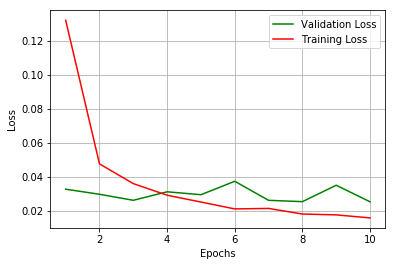

In [45]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show()

### 3 layer convolution layer with 3*3 kernel size

In [0]:
model3=Sequential() # Initializing the model

# First ConvNet
model3.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',padding='valid'))


model3.add(Dropout(0.5))


#hidden_layer
model3.add(Flatten())

model3.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model3.add(Dense(num_classes,activation='softmax'))

print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               1982720   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total para

In [0]:
model3.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [0]:
# Training the model
history = model3.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1678 - acc: 0.9483 - val_loss: 0.0434 - val_acc: 0.9846
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0512 - acc: 0.9839 - val_loss: 0.0333 - val_acc: 0.9888
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0375 - acc: 0.9883 - val_loss: 0.0329 - val_acc: 0.9881
Epoch 4/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0281 - acc: 0.9910 - val_loss: 0.0313 - val_acc: 0.9896
Epoch 5/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0232 - acc: 0.9927 - val_loss: 0.0242 - val_acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0194 - acc: 0.9937 - val_loss: 0.0246 - val_acc: 0.9923
Epoch 7/10
60000/60000 [==============================] - 3s 58us/step - loss: 

In [0]:
score = model3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

10000/10000 [==============================] - 1s 52us/step
Test loss: 0.024075999808483902
Test accuracy: 0.9931


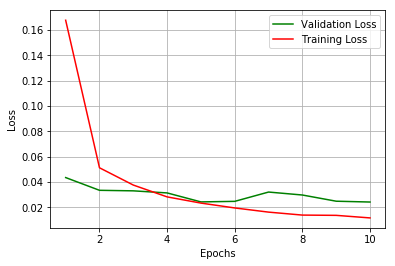

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

### Changing the dropout rate to 0.8

In [21]:
model3=Sequential() # Initializing the model

# First ConvNet
model3.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',padding='valid'))


model3.add(Dropout(0.8))


#hidden_layer
model3.add(Flatten())

model3.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model3.add(Dense(num_classes,activation='softmax'))

print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               1982720   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total para

In [0]:
model3.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [23]:
# Training the model
history = model3.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.2322 - acc: 0.9275 - val_loss: 0.0536 - val_acc: 0.9835
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0900 - acc: 0.9719 - val_loss: 0.0331 - val_acc: 0.9889
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0650 - acc: 0.9797 - val_loss: 0.0258 - val_acc: 0.9916
Epoch 4/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0524 - acc: 0.9832 - val_loss: 0.0245 - val_acc: 0.9905
Epoch 5/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0453 - acc: 0.9854 - val_loss: 0.0236 - val_acc: 0.9912
Epoch 6/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0401 - acc: 0.9872 - val_loss: 0.0222 - val_acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0372 - acc: 0.9879 - val_loss: 0.0246 - val_acc

In [24]:
score = model3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

10000/10000 [==============================] - 1s 56us/step
Test loss: 0.02286809604455375
Test accuracy: 0.9922


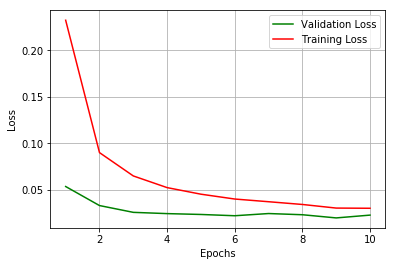

In [25]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

### Changing dropout rate to 0.2

In [36]:
model3=Sequential() # Initializing the model

# First ConvNet
model3.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',padding='valid'))


model3.add(Dropout(0.2))


#hidden_layer
model3.add(Flatten())

model3.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model3.add(Dense(num_classes,activation='softmax'))

print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_15 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               1982720   
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2570      
Total para

In [0]:
model3.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [38]:
# Training the model
history = model3.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.1493 - acc: 0.9556 - val_loss: 0.0432 - val_acc: 0.9861
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0424 - acc: 0.9867 - val_loss: 0.0359 - val_acc: 0.9883
Epoch 3/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0269 - acc: 0.9915 - val_loss: 0.0310 - val_acc: 0.9898
Epoch 4/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0204 - acc: 0.9933 - val_loss: 0.0377 - val_acc: 0.9876
Epoch 5/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0169 - acc: 0.9946 - val_loss: 0.0263 - val_acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0113 - acc: 0.9965 - val_loss: 0.0362 - val_acc: 0.9889
Epoch 7/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0085 - acc: 0.9972 - val_loss: 0.0329 - val_acc

In [39]:
score = model3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

10000/10000 [==============================] - 1s 51us/step
Test loss: 0.04763601563378916
Test accuracy: 0.9866


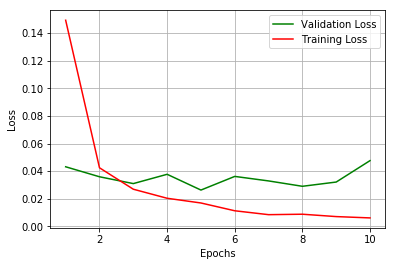

In [40]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

### 5 layer convolution layer with 5*5 kernel size

In [0]:
model4=Sequential() # Initializing the model

# First ConvNet
model4.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    input_shape=input_shape))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64,kernel_size=(5,5),
                    activation='relu'))

model4.add(BatchNormalization())


model4.add(Conv2D(128,kernel_size=(5,5),
                    activation='relu'))
model4.add(Dropout(0.5))



model4.add(Flatten())

#hidden_layer
model4.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model4.add(Dense(512,activation='relu',kernel_initializer='random_uniform'))

model4.add(Dropout(0.5))

model4.add(Dense(num_classes,activation='softmax'))

print(model4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
batch_normalization_12 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 4, 4, 128)         204928    
_________________________________________________________________
dropout_20 (Dropout)         (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
__________

In [0]:
model4.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [0]:
# Training the model
history = model4.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.1587 - acc: 0.9512 - val_loss: 0.0559 - val_acc: 0.9845
Epoch 2/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0551 - acc: 0.9844 - val_loss: 0.0496 - val_acc: 0.9872
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0452 - acc: 0.9872 - val_loss: 0.0389 - val_acc: 0.9896
Epoch 4/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0374 - acc: 0.9897 - val_loss: 0.0500 - val_acc: 0.9873
Epoch 5/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0303 - acc: 0.9913 - val_loss: 0.0401 - val_acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0314 - acc: 0.9915 - val_loss: 0.0388 - val_acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0273 - acc: 0.9929 - val_loss: 0.0360 - val_acc

In [0]:
score = model4.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

10000/10000 [==============================] - 1s 66us/step
Test loss: 0.046396231524863836
Test accuracy: 0.9905


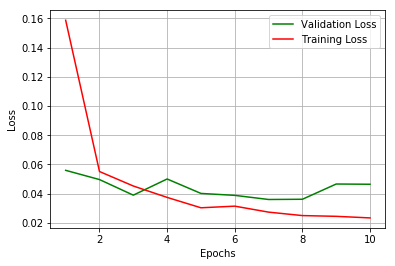

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

### Changing the dropout rate to 0.8

In [26]:
model4=Sequential() # Initializing the model

# First ConvNet
model4.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    input_shape=input_shape))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64,kernel_size=(5,5),
                    activation='relu'))

model4.add(BatchNormalization())


model4.add(Conv2D(128,kernel_size=(5,5),
                    activation='relu'))
model4.add(Dropout(0.8))



model4.add(Flatten())

#hidden_layer
model4.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model4.add(Dense(512,activation='relu',kernel_initializer='random_uniform'))

model4.add(Dropout(0.8))

model4.add(Dense(num_classes,activation='softmax'))

print(model4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 128)         204928    
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
__________

In [0]:
model4.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [28]:
# Training the model
history = model4.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.3279 - acc: 0.8987 - val_loss: 0.0602 - val_acc: 0.9834
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0944 - acc: 0.9759 - val_loss: 0.0702 - val_acc: 0.9819
Epoch 3/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0758 - acc: 0.9811 - val_loss: 0.0515 - val_acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0671 - acc: 0.9835 - val_loss: 0.0473 - val_acc: 0.9881
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0630 - acc: 0.9849 - val_loss: 0.0375 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0590 - acc: 0.9859 - val_loss: 0.0417 - val_acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0543 - acc: 0.9871 - val_loss: 0.0432 - val_acc

In [29]:
score = model4.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

10000/10000 [==============================] - 1s 61us/step
Test loss: 0.035173485061816334
Test accuracy: 0.9926


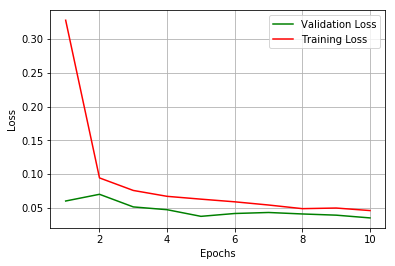

In [30]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

### Changing the dropout rate to 0.2

In [31]:
model4=Sequential() # Initializing the model

# First ConvNet
model4.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    input_shape=input_shape))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64,kernel_size=(5,5),
                    activation='relu'))

model4.add(BatchNormalization())


model4.add(Conv2D(128,kernel_size=(5,5),
                    activation='relu'))
model4.add(Dropout(0.2))



model4.add(Flatten())

#hidden_layer
model4.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model4.add(Dense(512,activation='relu',kernel_initializer='random_uniform'))

model4.add(Dropout(0.2))

model4.add(Dense(num_classes,activation='softmax'))

print(model4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 128)         204928    
_________________________________________________________________
dropout_13 (Dropout)         (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
__________

In [0]:
model4.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [33]:
# Training the model
history = model4.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1238 - acc: 0.9626 - val_loss: 0.0574 - val_acc: 0.9834
Epoch 2/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0444 - acc: 0.9868 - val_loss: 0.0405 - val_acc: 0.9878
Epoch 3/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0348 - acc: 0.9899 - val_loss: 0.0849 - val_acc: 0.9770
Epoch 4/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0289 - acc: 0.9916 - val_loss: 0.0332 - val_acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0244 - acc: 0.9929 - val_loss: 0.0664 - val_acc: 0.9841
Epoch 6/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0192 - acc: 0.9946 - val_loss: 0.0428 - val_acc: 0.9900
Epoch 7/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0197 - acc: 0.9943 - val_loss: 0.0682 - val_acc

In [34]:
score = model4.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

10000/10000 [==============================] - 1s 58us/step
Test loss: 0.03803959398596803
Test accuracy: 0.9914


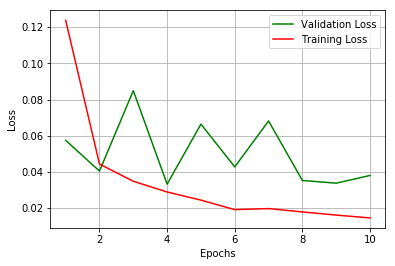

In [35]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

- - - 

# Conclusions

In [57]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Numer of Layers", "Kernel Size", "BN", "Dropout", "Accuracy"]

x.add_row(["3",'3*3', 'NO','0.5', 0.9931])
x.add_row(["3",'3*3', 'NO','0.8', 0.9922])
x.add_row(["3",'3*3', 'NO','0.2', 0.9866])


x.add_row(["4",'3*3', 'YES','0.5', 0.9934])
x.add_row(["4",'3*3', 'YES','0.8', 0.9697])
x.add_row(["4",'3*3', 'YES','0.2', 0.9802])

x.add_row(["4",'5*5', 'YES','0.5', 0.9931])
x.add_row(["4",'5*5', 'YES','0.8', 0.9845])
x.add_row(["4",'5*5', 'YES','0.2', 0.9937])

x.add_row(["5",'5*5', 'YES','0.5', 0.9905])
x.add_row(["5",'5*5', 'YES','0.8', 0.9926])
x.add_row(["5",'5*5', 'YES','0.2', 0.9914])



print(x)

+-----------------+-------------+-----+---------+----------+
| Numer of Layers | Kernel Size |  BN | Dropout | Accuracy |
+-----------------+-------------+-----+---------+----------+
|        3        |     3*3     |  NO |   0.5   |  0.9931  |
|        3        |     3*3     |  NO |   0.8   |  0.9922  |
|        3        |     3*3     |  NO |   0.2   |  0.9866  |
|        4        |     3*3     | YES |   0.5   |  0.9934  |
|        4        |     3*3     | YES |   0.8   |  0.9697  |
|        4        |     3*3     | YES |   0.2   |  0.9802  |
|        4        |     5*5     | YES |   0.5   |  0.9931  |
|        4        |     5*5     | YES |   0.8   |  0.9845  |
|        4        |     5*5     | YES |   0.2   |  0.9937  |
|        5        |     5*5     | YES |   0.5   |  0.9905  |
|        5        |     5*5     | YES |   0.8   |  0.9926  |
|        5        |     5*5     | YES |   0.2   |  0.9914  |
+-----------------+-------------+-----+---------+----------+
